In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'C:\\Users\\Dell\\Desktop\\Diabetes_1.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 1: Handling Missing Values
# Check for missing values in the dataset
print("Missing values before imputation:\n", data.isnull().sum())

Missing values before imputation:
 Pregnancies                 64
Glucose                     70
BloodPressure               69
SkinThickness               83
Insulin                     80
BMI                         78
DiabetesPedigreeFunction    76
Age                         76
Outcome                     67
Gender                      76
Region                      76
Income_Level                76
dtype: int64


In [4]:
# Impute missing values (if any)
for col in data.columns:
    if data[col].dtype == 'object':  # For categorical data, use mode
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # For numerical data, use mean
        data[col].fillna(data[col].mean(), inplace=True)

print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Gender                      0
Region                      0
Income_Level                0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_7172\1931634751.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7172\1931634751.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [5]:
# Identify numerical features
numerical_features = data.select_dtypes(include=[float, int]).columns

# Step 1: Standardization (Z-score)
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("\nData after Standardization (Z-score):")
print(data[numerical_features].head())

# Step 2: Min-Max Scaling
minmax_scaler = MinMaxScaler()
data[numerical_features] = minmax_scaler.fit_transform(data[numerical_features])

print("\nData after Min-Max Scaling:")
print(data[numerical_features].head())

# Save the processed dataset
scaled_file_path = "Scaled_Diabetes_with_Categorical.csv"
data.to_csv(scaled_file_path, index=False)
print(f"Scaled dataset saved to: {scaled_file_path}")



Data after Standardization (Z-score):
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0  7.529111e-01  0.875485       0.172262   9.013103e-01  0.000000   
1  1.352498e-16 -1.154494      -0.137654   4.813905e-01 -0.751582   
2  1.067855e+00  2.093245      -0.273662  -2.354095e-16 -0.739515   
3 -6.933794e-01 -1.048388      -0.141252   1.363035e-01  0.131191   
4 -1.288677e+00  0.550234      -1.634523   9.397452e-01  0.826541   

            BMI  DiabetesPedigreeFunction       Age   Outcome  
0 -9.536254e-16                  0.442659  1.472298 -0.559976  
1 -7.360646e-01                 -0.011748  0.000000 -0.162497  
2 -9.536254e-16                  2.129978  0.000000  1.382935  
3 -4.897375e-01                 -1.308821 -1.088875 -0.877212  
4  1.654205e+00                  2.144642  0.004533  1.276746  

Data after Min-Max Scaling:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.500652  0.735020       0.608351       0.359880 

In [6]:
# Define numerical columns for outlier detection
numerical_columns = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# Loop through numerical columns to detect and handle outliers
for col in numerical_columns:
    # Step 1: Detect outliers using Z-score
    data[f'{col}_zscore'] = (data[col] - data[col].mean()) / data[col].std()
    outliers = data[np.abs(data[f'{col}_zscore']) > 3]
    print(f"\nOutliers detected in {col}:\n", outliers)

    # Step 2: Handle outliers by capping
    data[f'{col}_capped'] = data[col]
    data.loc[np.abs(data[f'{col}_zscore']) > 3, f'{col}_capped'] = data[col].mean()

# Save the processed dataset
processed_file_path = "C:\\Users\\Dell\\Desktop\\Diabetes.csv"
data.to_csv(processed_file_path, index=False)

print(f"\nProcessed dataset saved to: {processed_file_path}")


Outliers detected in Glucose:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
75      0.223852  0.010514       0.424630       0.228366  0.003336  0.390959   
182     0.278219  0.018586       0.613394       0.212085  0.036074  0.435755   
342     0.215791  0.002033       0.578582       0.368678  0.004619  0.513707   
349     0.481442  0.002444       0.672148       0.355219  0.005318  0.647873   
502     0.492066  0.000000       0.586992       0.415827  0.003783  0.628235   

     DiabetesPedigreeFunction       Age   Outcome  Gender Region Income_Level  \
75                   0.478157  0.065087  0.441077  Female  South          Low   
182                  0.657645  0.050106  0.463955    Male   East          Low   
342                  0.547113  0.232595  0.838664    Male   East          Low   
349                  0.474936  0.282917  0.469097  Female  South         High   
502                  0.280165  0.377162  0.445719  Female  South          Low   



In [7]:
# Ensure the target variable is binary
data['Outcome'] = data['Outcome'].round().astype(int)  # Convert to binary if not already

# Define features (X) and target (y)
X = data.drop(columns=["Outcome", "Gender", "Region", "Income_Level"])  # Exclude categorical columns and target
y = data["Outcome"]

# 1. Filter Method: Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k="all")
mi_selector.fit(X, y)
mi_scores = pd.DataFrame({
    "Feature": X.columns,
    "Mutual_Info_Score": mi_selector.scores_
}).sort_values(by="Mutual_Info_Score", ascending=False)

# 2. Wrapper Method: Recursive Feature Elimination (RFE)
log_model = LogisticRegression(max_iter=1000)
rfe_selector = RFE(estimator=log_model, n_features_to_select=5)
rfe_selector.fit(X, y)
rfe_features = X.columns[rfe_selector.support_]

# 3. Embedded Method: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_features = pd.DataFrame({
    "Feature": X.columns,
    "Lasso_Coefficient": lasso.coef_
}).sort_values(by="Lasso_Coefficient", ascending=False)
selected_lasso_features = lasso_features[lasso_features["Lasso_Coefficient"] != 0]

# Display Results
print("\nMutual Information Scores:")
print(mi_scores)

print("\nFeatures Selected by RFE:")
print(rfe_features.tolist())

print("\nLasso Regression Selected Features:")
print(selected_lasso_features)

# Save Results
mi_scores.to_csv("C:\\Users\\Dell\\Desktop\\Diabetes.csv", index=False)
selected_lasso_features.to_csv("C:\\Users\\Dell\\Desktop\\Diabetes.csv", index=False)


Mutual Information Scores:
                     Feature  Mutual_Info_Score
8             Glucose_zscore           0.023734
1                    Glucose           0.017850
9             Glucose_capped           0.016268
4                    Insulin           0.014402
0                Pregnancies           0.012828
14                Age_zscore           0.012260
15                Age_capped           0.001863
2              BloodPressure           0.000000
3              SkinThickness           0.000000
5                        BMI           0.000000
6   DiabetesPedigreeFunction           0.000000
7                        Age           0.000000
10      BloodPressure_zscore           0.000000
11      BloodPressure_capped           0.000000
12                BMI_zscore           0.000000
13                BMI_capped           0.000000

Features Selected by RFE:
['Pregnancies', 'Insulin', 'Glucose_zscore', 'BloodPressure_zscore', 'BMI_zscore']

Lasso Regression Selected Features:
         

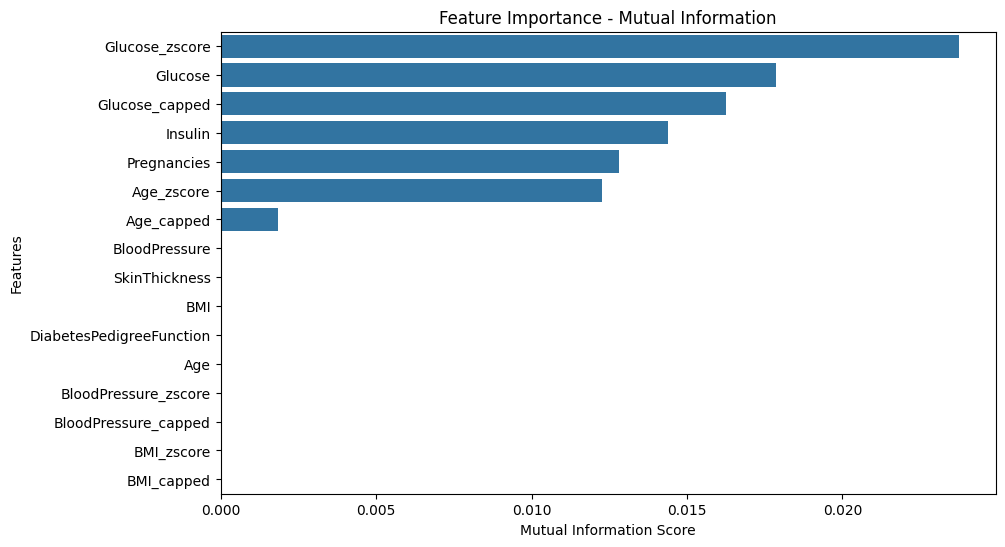

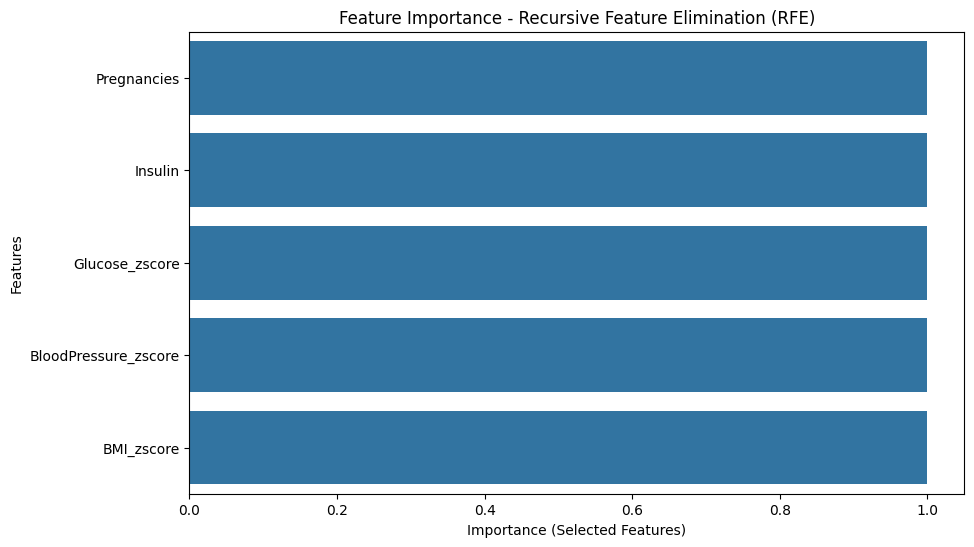

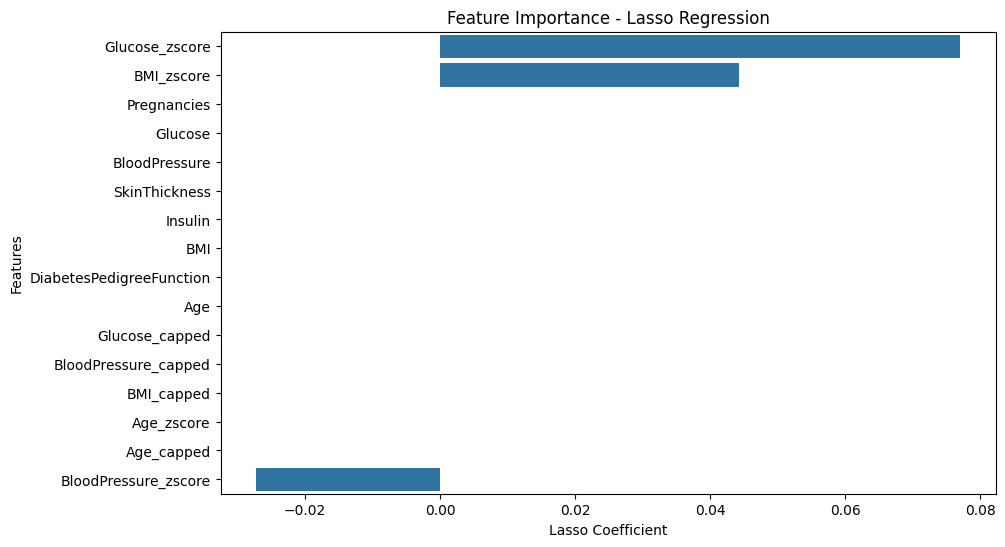

In [8]:
# 1. Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Mutual_Info_Score", y="Feature", data=mi_scores)
plt.title("Feature Importance - Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

# 2. Plot RFE Selected Features
rfe_importance = pd.DataFrame({"Feature": rfe_features, "Importance": [1] * len(rfe_features)})  # Importance as a placeholder
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=rfe_importance)
plt.title("Feature Importance - Recursive Feature Elimination (RFE)")
plt.xlabel("Importance (Selected Features)")
plt.ylabel("Features")
plt.show()

# 3. Plot Lasso Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Lasso_Coefficient", y="Feature", data=lasso_features)
plt.title("Feature Importance - Lasso Regression")
plt.xlabel("Lasso Coefficient")
plt.ylabel("Features")
plt.show()